In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
dpath='D:/zhenqiyuce//'

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer

In [3]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [4]:
pd.set_option('max_colwidth',200)
pd.set_option('display.width',200)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)

In [7]:
train=pd.read_table(dpath+'zhengqi_train.txt')
test=pd.read_table(dpath+'zhengqi_test.txt')
print(train.shape)
print(test.shape)

(2888, 39)
(1925, 38)


In [8]:
train.head(5)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,-0.940,-0.307,-0.073,0.550,-0.484,0.000,-1.707,-1.162,-0.573,-0.991,0.610,-0.400,-0.063,0.356,0.800,-0.223,0.796,0.168,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,0.188,-0.455,-0.134,1.109,-0.488,0.000,-0.977,-1.162,-0.571,-0.836,0.588,-0.802,-0.063,0.357,0.801,-0.144,1.057,0.338,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,0.874,-0.051,-0.072,0.767,-0.493,-0.212,-0.618,-0.897,-0.564,-0.558,0.576,-0.477,-0.063,0.355,0.961,-0.067,0.915,0.326,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,0.011,0.102,-0.014,0.769,-0.371,-0.162,-0.429,-0.897,-0.574,-0.564,0.272,-0.491,-0.063,0.352,1.435,0.113,0.898,0.277,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,-0.251,0.570,0.199,-0.349,-0.342,-0.138,-0.391,-0.897,-0.572,-0.394,0.106,0.309,-0.259,0.352,0.881,0.221,0.386,0.332,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


In [9]:
test.head(5)

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,-0.419,0.515,0.346,-0.114,-0.204,0.239,-0.089,0.961,0.247,0.899,-0.252,0.628,-0.063,0.098,-1.314,-0.662,-0.596,0.208,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,-0.403,-0.324,0.465,0.653,0.148,-0.113,-0.093,0.961,0.073,1.168,-0.276,0.009,-0.063,0.090,-1.310,-0.646,-0.776,0.226,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,0.330,0.389,0.173,0.398,0.068,-0.192,-0.061,0.961,0.070,0.980,-0.340,0.270,-0.063,0.091,-1.310,-0.473,-0.607,0.084,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,-0.431,0.524,-0.038,-0.340,-0.313,-0.590,-0.134,0.961,0.078,1.070,-0.292,0.726,0.133,0.086,0.234,-0.337,-0.986,0.203,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,-0.162,0.554,-0.063,0.611,-0.319,-0.927,-0.075,0.961,0.080,1.238,-0.150,0.141,0.133,0.089,0.237,-0.285,-0.669,0.227,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


In [10]:
full=pd.concat([train,test], ignore_index=True)
print(full.shape)

(4813, 39)


In [11]:
#看各特征的缺失值数量
aa = full.isnull().sum()
aa[aa>0].sort_values(ascending=False)
#没有缺失值

target    1925
dtype: int64

In [24]:
n_train=train.shape[0]
X = full[:n_train].drop("target",axis=1)
test_X = full[n_train:].drop("target",axis=1)
y= train.target

In [25]:
X.head(5)

,V0,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V3,V30,V31,V32,V33,V34,V35,V36,V37,V4,V5,V6,V7,V8,V9
0,0.566,0.016,-0.940,-0.307,-0.073,0.550,-0.484,0.000,-1.707,-1.162,-0.573,-0.991,-0.143,0.610,-0.400,-0.063,0.356,0.800,-0.223,0.796,0.168,-0.450,0.136,0.407,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.452,-0.901,-1.812,-2.360,-0.436,-2.114
1,0.968,0.437,0.188,-0.455,-0.134,1.109,-0.488,0.000,-0.977,-1.162,-0.571,-0.836,0.066,0.588,-0.802,-0.063,0.357,0.801,-0.144,1.057,0.338,0.671,-0.128,0.566,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.194,-0.893,-1.566,-2.360,0.332,-2.114
2,1.013,0.568,0.874,-0.051,-0.072,0.767,-0.493,-0.212,-0.618,-0.897,-0.564,-0.558,0.235,0.576,-0.477,-0.063,0.355,0.961,-0.067,0.915,0.326,1.287,-0.009,0.370,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.112,-0.797,-1.367,-2.360,0.396,-2.114
3,0.733,0.368,0.011,0.102,-0.014,0.769,-0.371,-0.162,-0.429,-0.897,-0.574,-0.564,0.283,0.272,-0.491,-0.063,0.352,1.435,0.113,0.898,0.277,1.298,0.015,0.165,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.599,-0.679,-1.200,-2.086,0.403,-2.114
4,0.684,0.638,-0.251,0.570,0.199,-0.349,-0.342,-0.138,-0.391,-0.897,-0.572,-0.394,0.260,0.106,0.309,-0.259,0.352,0.881,0.221,0.386,0.332,1.289,0.183,0.209,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.337,-0.454,-1.073,-2.086,0.314,-2.114


In [26]:
y.head(5)

0    0.175
1    0.676
2    0.633
3    0.206
4    0.384
Name: target, dtype: float64

In [28]:
test_X.head(5)

,V0,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V3,V30,V31,V32,V33,V34,V35,V36,V37,V4,V5,V6,V7,V8,V9
2888,0.368,0.380,-0.419,0.515,0.346,-0.114,-0.204,0.239,-0.089,0.961,0.247,0.899,-0.225,-0.252,0.628,-0.063,0.098,-1.314,-0.662,-0.596,0.208,-0.449,0.047,-0.049,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388,0.379,0.092,0.550,0.551,0.244,0.904
2889,0.148,0.489,-0.403,-0.324,0.465,0.653,0.148,-0.113,-0.093,0.961,0.073,1.168,-0.247,-0.276,0.009,-0.063,0.090,-1.310,-0.646,-0.776,0.226,-0.443,0.047,-0.049,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104,0.122,-0.201,0.487,0.493,-0.127,0.904
2890,-0.166,-0.062,0.330,0.389,0.173,0.398,0.068,-0.192,-0.061,0.961,0.070,0.980,-0.311,-0.340,0.270,-0.063,0.091,-1.310,-0.473,-0.607,0.084,-0.458,-0.398,0.046,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569,-0.055,0.063,0.485,0.493,-0.227,0.904
2891,0.102,0.294,-0.431,0.524,-0.038,-0.340,-0.313,-0.590,-0.134,0.961,0.078,1.070,-0.259,-0.292,0.726,0.133,0.086,0.234,-0.337,-0.986,0.203,-0.456,-0.398,0.051,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391,-0.183,0.148,0.474,0.504,0.010,0.904
2892,0.300,0.428,-0.162,0.554,-0.063,0.611,-0.319,-0.927,-0.075,0.961,0.080,1.238,0.208,-0.150,0.141,0.133,0.089,0.237,-0.285,-0.669,0.227,-0.458,-0.776,0.051,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497,-0.033,0.116,0.408,0.497,0.155,0.904


In [29]:
lasso=Lasso(alpha=0.001)
lasso.fit(X,y) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X.columns)
FI_lasso

,Feature Importance
V0,0.345417
V1,0.188009
V10,0.293780
V11,0.026063
V12,0.095972
V13,-0.001680
V14,0.052831
V15,-0.000000
V16,0.023222
V17,0.084721


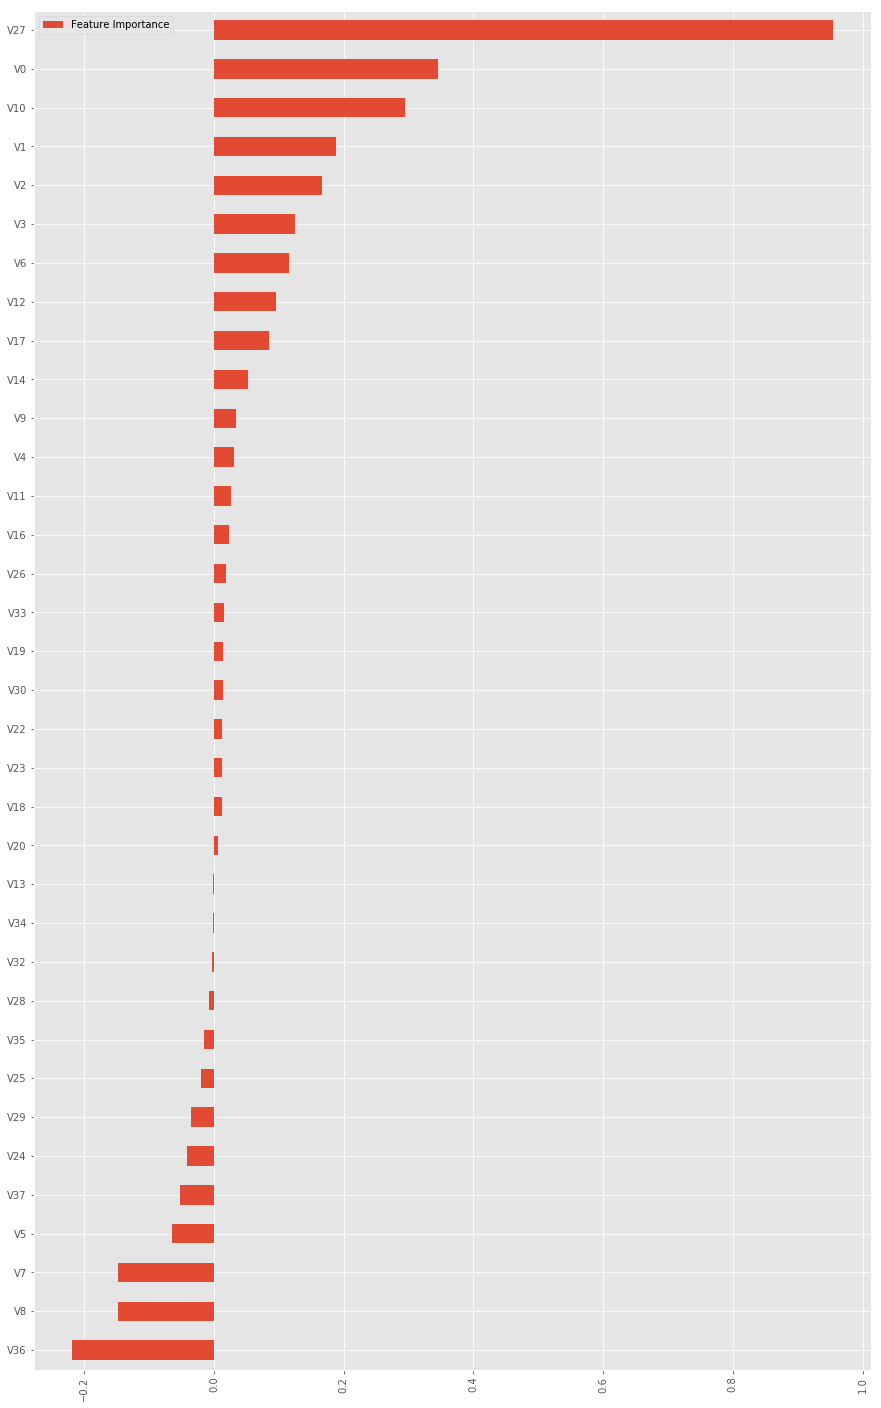

In [31]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'SalePrice')

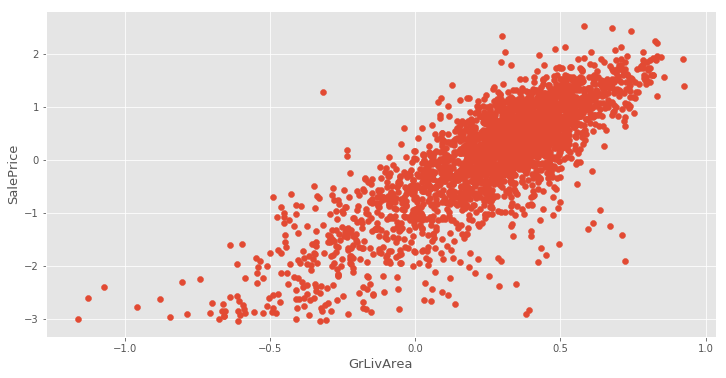

In [44]:
plt.figure(figsize=(12,6))
plt.scatter(x=X.V27, y=y)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

Text(0, 0.5, 'SalePrice')

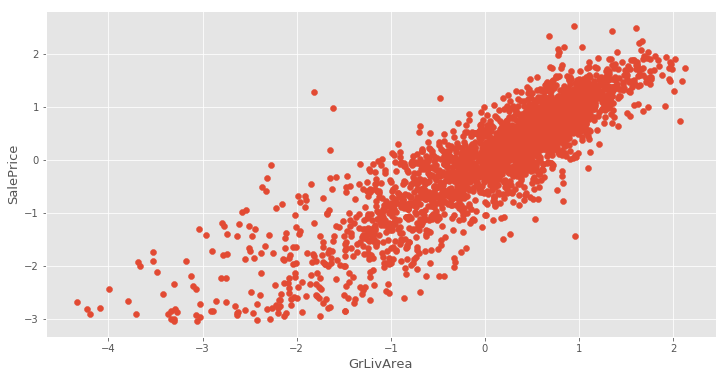

In [45]:
plt.figure(figsize=(12,6))
plt.scatter(x=X.V0, y=y)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)

In [32]:
#pca降维
pca = PCA(n_components=38)
X_pca=pca.fit_transform(X)
test_X_pca = pca.transform(test_X)

In [33]:
X_pca.shape, test_X_pca.shape

((2888, 38), (1925, 38))

## 基本建模&评估

In [34]:
#定义RMSE的交叉验证评估指标
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [ ]:
使用了13个算法和5折交叉验证来评估baseline效果：
LinearRegression                     线性回归
Ridge                                岭回归
Lasso                                Lasso回归
Random Forrest                       随机森林
Gradient Boosting Tree               梯度提升树
Support Vector Regression            支持向量回归
Linear Support Vector Regression     线性支持向量回归
ElasticNet                           
Stochastic Gradient Descent          随机梯度下降
BayesianRidge                        
KernelRidge                          
ExtraTreesRegressor                   
XgBoost                              XGboost

In [62]:
models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor(num_round = 2)]
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]

In [63]:
for name, model in zip(names, models):
    score = rmse_cv(model, X,y)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 0.344197, 0.0338
Ridge: 0.344229, 0.0339
Lasso: 0.358510, 0.0347
RF: 0.396124, 0.0364
GBR: 0.370625, 0.0342
SVR: 0.399103, 0.0420
LinSVR: 0.346244, 0.0370
Ela: 0.343950, 0.0346
SGD: 0.362436, 0.0350
Bay: 0.344612, 0.0340
Ker: 0.373308, 0.0401
Extra: 0.384363, 0.0382
Xgb: 0.368024, 0.0350


LR: 0.344197, 0.0338
Ridge: 0.344229, 0.0339
Lasso: 0.370284, 0.0286
RF: 0.434066, 0.0372
GBR: 0.386689, 0.0353
SVR: 0.399103, 0.0420
LinSVR: 0.345505, 0.0358
Ela: 0.343252, 0.0348
SGD: 0.359934, 0.0349
Bay: 0.344612, 0.0340
Ker: 0.373579, 0.0403
Extra: 0.430645, 0.0377
Xgb: 0.385635, 0.0295

In [38]:
# 调参
class grid():
    def __init__(self,model):
        self.model = model
    
    def grid_get(self,X,y,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X,y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [41]:
### Lasso
grid(Lasso()).grid_get(X_pca,y,{'alpha': [0.0004,0.0005,0.0007,0.0006,0.0009,0.0008],'max_iter':[10000]})

{'alpha': 0.0009, 'max_iter': 10000} 0.34435128840848606
                                 params  mean_test_score  std_test_score
0  {'alpha': 0.0004, 'max_iter': 10000}         0.344921        0.023744
1  {'alpha': 0.0005, 'max_iter': 10000}         0.344756        0.023840
2  {'alpha': 0.0007, 'max_iter': 10000}         0.344494        0.024018
3  {'alpha': 0.0006, 'max_iter': 10000}         0.344609        0.023932
4  {'alpha': 0.0009, 'max_iter': 10000}         0.344351        0.024148
5  {'alpha': 0.0008, 'max_iter': 10000}         0.344410        0.024088


In [61]:
### Ridge
grid(Ridge()).grid_get(X,y,{'alpha':[1,5,10,15,55,60,65,70,80,90]})

{'alpha': 1} 0.34587455007201406
          params  mean_test_score  std_test_score
0   {'alpha': 1}         0.345875        0.023356
1   {'alpha': 5}         0.346773        0.023609
2  {'alpha': 10}         0.348316        0.023782
3  {'alpha': 15}         0.349758        0.023878
4  {'alpha': 55}         0.356037        0.023812
5  {'alpha': 60}         0.356481        0.023767
6  {'alpha': 65}         0.356888        0.023719
7  {'alpha': 70}         0.357266        0.023669
8  {'alpha': 80}         0.357947        0.023565
9  {'alpha': 90}         0.358551        0.023458


In [50]:
### SVR
grid(SVR()).grid_get(X_pca,y,{'C':[11,12,13,14,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]})

{'C': 15, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'} 0.3489777656903831
                                                           params  mean_test_score  std_test_score
0   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}         0.353361        0.023278
1   {'C': 11, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}         0.350815        0.023722
2   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}         0.353316        0.023267
3   {'C': 11, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'}         0.350842        0.023613
4   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0003, 'kernel': 'rbf'}         0.353016        0.023263
5   {'C': 12, 'epsilon': 0.008, 'gamma': 0.0004, 'kernel': 'rbf'}         0.350461        0.023635
6   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'}         0.352941        0.023289
7   {'C': 12, 'epsilon': 0.009, 'gamma': 0.0004, 'kernel': 'rbf'}         0.350372        0.023650
8   {'C': 13, 'epsilon': 0.0

In [64]:
### XGB
grid(XGBRegressor()).grid_get(X,y,{'max_depth':[2,3,4], 'eta':[0.01,0.05,0.1] ,'n_estimators': [400, 500],'min_child_weight': [1, 2, 3, 4, 5, 6]})

{'eta': 0.01, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 400} 0.3669566011306524
                                                                        params  mean_test_score  std_test_score
0    {'eta': 0.01, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 400}         0.371878        0.024887
1    {'eta': 0.01, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 500}         0.371342        0.024741
2    {'eta': 0.01, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 400}         0.371384        0.025116
3    {'eta': 0.01, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 500}         0.371378        0.025108
4    {'eta': 0.01, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 400}         0.372204        0.025209
5    {'eta': 0.01, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 500}         0.371973        0.025367
6    {'eta': 0.01, 'max_depth': 2, 'min_child_weight': 4, 'n_estimators': 400}         0.370760        0.025191
7    {'eta'

In [70]:
### XGB
grid(XGBRegressor(booster='gblinear')).grid_get(X,y,{'eta':[0.01,0.05,0.1] ,'n_estimators': [400, 500]})

{'eta': 0.01, 'n_estimators': 400} 0.40999354113114916
                               params  mean_test_score  std_test_score
0  {'eta': 0.01, 'n_estimators': 400}         0.409994        0.023507
1  {'eta': 0.01, 'n_estimators': 500}         0.409994        0.023507
2  {'eta': 0.05, 'n_estimators': 400}         0.409994        0.023507
3  {'eta': 0.05, 'n_estimators': 500}         0.409994        0.023507
4   {'eta': 0.1, 'n_estimators': 400}         0.409994        0.023507
5   {'eta': 0.1, 'n_estimators': 500}         0.409994        0.023507
